# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [23]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
#dir_data = './data/'
dir_data = 'file:///C:/Users/tthcy/Documents/ML馬拉松/Part01/'

### 之前做過的處理

In [24]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [25]:
s_df = app_train[['SK_ID_CURR','DAYS_BIRTH','TARGET']].sort_values(by = ['DAYS_BIRTH']) #拆出subset

In [26]:
s_df['YEARS_BIRTH'] = s_df['DAYS_BIRTH'] / -365

In [27]:
s_df.head(5)

,SK_ID_CURR,DAYS_BIRTH,TARGET,YEARS_BIRTH
265026,406901,-25229,0,69.120548
124430,244301,-25201,0,69.043836
63316,173431,-25201,0,69.043836
143266,266125,-25200,0,69.041096
130108,250902,-25197,0,69.032877


In [28]:
bin_cut = np.linspace(20,70,11)
s_df['YEARS_BINNED'] = pd.cut(s_df['YEARS_BIRTH'], bins = bin_cut) #.cut

In [30]:
# 依照組別彙整年齡資料 "每一欄的平均值"
age_groups  = s_df.groupby('YEARS_BINNED').mean()
age_groups

,SK_ID_CURR,DAYS_BIRTH,TARGET,YEARS_BIRTH
YEARS_BINNED,,,,
"(20.0, 25.0]",277358.960688,-8532.795625,0.123036,23.377522
"(25.0, 30.0]",277837.106628,-10155.219250,0.111436,27.822518
"(30.0, 35.0]",277962.566709,-11854.848377,0.102814,32.479037
"(35.0, 40.0]",278149.565527,-13707.908253,0.089414,37.555913
"(40.0, 45.0]",278885.543375,-15497.661233,0.078491,42.459346
"(45.0, 50.0]",277999.882226,-17323.900441,0.074171,47.462741
"(50.0, 55.0]",278391.825883,-19196.494791,0.066968,52.593136
"(55.0, 60.0]",278547.738647,-20984.262742,0.055314,57.491131
"(60.0, 65.0]",277842.816858,-22780.547460,0.052737,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

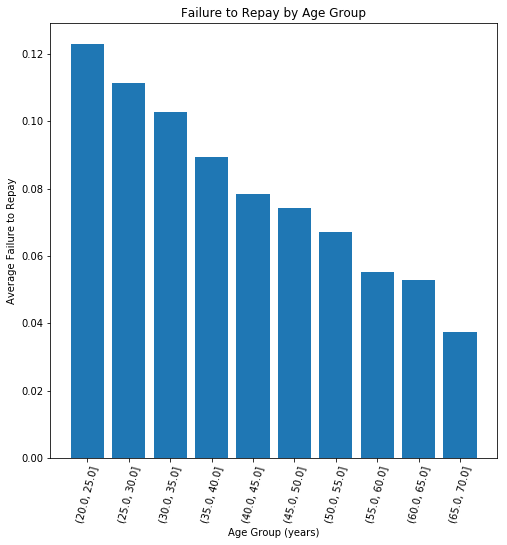

In [32]:
plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 75)
plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group')

In [7]:
s_df.head(10)

,SK_ID_CURR,DAYS_BIRTH,TARGET,YEARS_BIRTH,YEARS_BINNED
265026,406901,-25229,0,69.120548,"(65.0, 70.0]"
124430,244301,-25201,0,69.043836,"(65.0, 70.0]"
63316,173431,-25201,0,69.043836,"(65.0, 70.0]"
143266,266125,-25200,0,69.041096,"(65.0, 70.0]"
130108,250902,-25197,0,69.032877,"(65.0, 70.0]"
169562,296522,-25197,0,69.032877,"(65.0, 70.0]"
173470,301028,-25196,0,69.030137,"(65.0, 70.0]"
282013,426649,-25196,0,69.030137,"(65.0, 70.0]"
226213,362009,-25196,0,69.030137,"(65.0, 70.0]"
169823,296825,-25196,0,69.030137,"(65.0, 70.0]"


In [20]:
import seaborn as sns

Text(0.5, 1.0, 'YEARS_BINNED to TARGET bar plot')

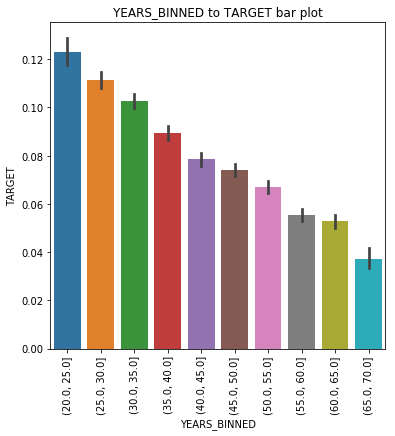

In [22]:
plt.figure(figsize=(6,6))
ax = sns.barplot(s_df['YEARS_BINNED'], s_df['TARGET'])
plt.xticks(rotation = 90)
ax.set_title('YEARS_BINNED to TARGET bar plot')